# The heat equation

Let $\Omega= (0,1) \times (0,1)$ and consider the heat equation

$$
\frac{\partial u}{\partial t} - k \Delta u = 0 \quad \text{in} \; \Omega \;\text{ and } \; t>0,
$$

where the temperature field is denoted by $u$ and the thermal diffusivity by $k =10^{-2}$. The initial distribution of temperature is uniform and equal to $u(\cdot,t=0)=20$. The heat equation allows to determine the evolution in time of the temperature distribution $u$ in $\Omega$ for $t > 0$.

The equation needs to be complemented with proper boundary conditions, which represent the interaction of the system with the surrounding environment. For every $t>0$, the temperature is kept fixed at 

$$
  u = 40 \quad\text{ on }  
  \Gamma_D = \left\{(x,y)\in \partial\Omega \,|\, x = 0 \text{ and } y \in \left(\frac{1}{4}, \frac{3}{4}\right) \right\},
$$

while on the boundary 

$$
  \Gamma_R= \left\{(x,y) \in \partial\Omega \,|\, x \in 
  \left(\frac{1}{4}, \frac{3}{4}\right) \text{ and } y = 1\right\}
$$

the material may exchange energy with the surrounding environment (owing to the difference of the temperature of the material with the temperature of the environment $u_{\text{env}} = 5$) according to the linear Newton's law of cooling

$$
  -k \boldsymbol{\nabla} u \cdot\boldsymbol{n}=\alpha (u-u_{\text{env}}),
$$

with $\alpha = 10^{-2}$. Finally, the remaining part of the boundary $\Gamma_N=\partial\Omega\setminus(\Gamma_D\cup\Gamma_R)$ is adiabatic, i.e. 

$$
  -k \boldsymbol{\nabla} u \cdot \boldsymbol{n} = 0.
$$

## Weak formulation in space

First of all we observe that the function $\tilde{u}=u-40$ solve the heat equation and satisfies a homogeneous Dirichlet condition on $\Gamma_D$. The Neumman condition for $\tilde{u}$ is still homogeneous, but the Robin condition need to be modified according to
$$
-k \nabla \tilde{u} \cdot \vec{n} = \alpha (\tilde{u} -\tilde{u}_{\text{env}}),
$$
with $\tilde{u}_{\text{env}} = u_{\text{env}}-40$.
For simplicity, we rename $\tilde{u}$ with $u$ observing that, in the end, we have to add 40 to obtain the solution to the physical problem. 

We multiply the equation by a test
function $v\in H^1_{0,\Gamma_D}(\Omega)$ and we integrate by parts over $\Omega$ to obtain:
\begin{equation*}
\int_{\Omega} \dfrac{\partial u}{\partial t} v  \, d\boldsymbol{x} +
  \int_{\partial\Omega} (-k \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, d\sigma +
  \int_\Omega k\boldsymbol{\nabla} u\cdot \boldsymbol{\nabla} v \, d\boldsymbol{x} =0.
\end{equation*}

Since we are dealing with homogeneous Dirichlet and Neumann condition, **the contributions of $\Gamma_D$ and $\Gamma_N$ on the integral over the boundary $\partial\Omega$ vanish**. Thus we can rewrite the boundary term as
\begin{equation*}
  \int_{\partial\Omega} (-k \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, d\sigma =
  \int_{\Gamma_R} (-k \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, d\sigma,
\end{equation*}
and enforce the **Robin condition** on $\Gamma_R$ according to
\begin{equation*}
  \int_{\Gamma_R} (-k \boldsymbol{\nabla} u\cdot{\boldsymbol{n}}) v \, d\sigma =
    \int_{\Gamma_R} \alpha (u - u_{\text{env}} +40) v \, d\sigma.
\end{equation*}

Then, we reorder the terms to leave the functions depending on $u$ on the left-hand side and the functions depending on the problem data on the right-hand side. Proceeding in this way, we obtain
\begin{equation*}
\int_{\Omega} \dfrac{\partial u}{\partial t} v  \, d\boldsymbol{x} +
  \int_\Omega  k\boldsymbol{\nabla} u\cdot \boldsymbol{\nabla} v \, d\boldsymbol{x}
  + \int_{\Gamma_R} \alpha u v \, d\sigma =
  \int_{\Gamma_R} \alpha (u_{\text{env}} -40) v \, d\sigma.
\end{equation*}

Therefore the **weak formulation in space** reads:  
$$
\text{Find } u\in H^1(0,T_f;L^2(\Omega)) \cap L^2(0,T_f;H^1_{0,\Gamma_D}(\Omega)) \;\text{ such that } \; 
\dfrac{\partial}{\partial t} (u,v)_\Omega
+a(u, v) = L(v) \quad \forall v\in H^1_{0,\Gamma_D}(\Omega),
$$ 
where the **bilinear form** $a$ and the **linear functional** L are defined by
\begin{equation*}
  a(u, v) = \int_\Omega k\boldsymbol{\nabla} u\cdot \boldsymbol{\nabla} v \, d\boldsymbol{x}
          + \int_{\Gamma_R} \alpha u v \, d\sigma,
\qquad
  L(v) = \int_{\Gamma_R} \alpha (u_{\text{env}} -40) v \, d\sigma.
\end{equation*}
The previous equation is completed with the initial condition $u(\cdot,t=0)= 20 -40 = -20$.

## Semi-discrete formulation

Let's consider a uniform subdivision of the time interval $I$ into $N$ subintervals of length $\delta t$. For conciseness, we adopt the notation $u_n= u(n\ \delta t)$ and $f_n= f(n\ \delta t)$ for all $n\in\{ 0, N\}$.
Discretizing the time derivative by the **$\theta$-method**, i.e.
      $$
        \frac{\partial u}{\partial t} = A u + f
        \quad\rightarrow\quad
        \frac{u_{n+1} - u_{n}}{\delta t} =
          \theta A u_{n+1} + (1 - \theta) A u_{n} +
          \theta f_{n+1} + (1 - \theta) f_n,
      $$
leads to
$$
\left(\frac{u_{n+1} - u_{n}}{\delta t},v \right)_\Omega
+\theta a(u_{n+1},v) + (1-\theta) a(u_n,v) =
\theta L_{n+1}(v) + (1-\theta) L_n(v) \quad \forall n\in\{ 1, N\},
$$
with $u_0$ given by the initial condition. 

Rearranging the previous equation, and observing that $L_{n} = L$ for all $n\in\{ 1, N\}$ since $u_{\rm env}$ is constant in time, we obtain the semi-discrete formulation: For all $n\in\{ 0, N-1\}$, find $u_{n+1}$ such that

$$
(u_{n+1},v)_\Omega + \delta t\theta\ a(u_{n+1},v)=
(u_{n},v)_\Omega + \delta t(\theta-1)\ a(u_{n},v)+
\delta t L(v).
$$

We remark that the choice **$\theta = 0.5$** corresponds to the second-order convergent **Crank-Nicolson time advancing scheme**.

## Numerical solution with FEniCS

We solve the problem using the **$\mathbb{P}^2$ FEM for the spatial discretization** and the **Crank-Nicolson scheme for the advance in time**.

In [ ]:
%%capture
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

In [ ]:
from fenics import *
from mshr import *
import matplotlib.pyplot as plt
import numpy as np

After importing fenics, we generate the mesh and distinguish the different portions of the boundary in order to account for the mixed type BCs.

In [ ]:
# 1a. generate the mesh
nx, ny = 50, 50
mesh = UnitSquareMesh(nx, ny, 'crossed')
dim = mesh.geometric_dimension()


# 1b. mark the boundaries
boundary_markers = MeshFunction('size_t', mesh, dim-1, 0)

class Boundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary

class DirichletBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[0], 0.0) and (0.25 <= x[1] <= 0.75)

class RobinBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[1], 1.0) and (0.25 <= x[0] <= 0.75)

Boundary().mark(boundary_markers, 1)
DirichletBoundary().mark(boundary_markers, 2)
RobinBoundary().mark(boundary_markers, 3)


# 1c. setting up the measures
dx = Measure('dx', domain=mesh)
ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)

Then, we define the finite dimensional space for the approximation and enforce the essential boundary condition.

In [ ]:
# 2a. definition of finite element space
degree = 2
V = FunctionSpace(mesh, 'CG', degree)

# 2b. denition of Dirichlet conditions
gD = Constant(0.0)
bc = DirichletBC(V, gD, boundary_markers, 2)

Now we can define the discrete problem following, as usual the variational approach of FEniCS.

In [ ]:
# 3a. definition of problem data
k = Constant(1.e-2)
alpha = Constant(1.e-2)
Tfin = 200.0
dt = 5.0
theta = 0.5

uEnv = Constant(-35.0)
u_old = project(Constant(-20), V)
u_old.rename('temperature', 'temperature')

# 3b. Assemble matrix and rhs
u = TrialFunction(V)
v = TestFunction(V)

a = (u * v / dt + theta * k * dot(grad(u), grad(v))) * dx + theta * alpha * u * v * ds(3)
L = (u_old * v / dt - (1 - theta) * k * inner(grad(u_old), grad(v))) * dx + alpha * (uEnv - (1 - theta) * u_old) * v * ds(3)

To conclude, we invert the matrix A and perform the advance in time. 

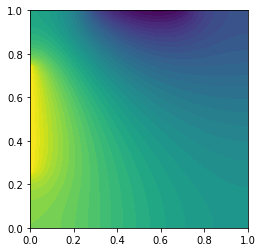

In [ ]:
# 4a. assemble the system
A = assemble(a)
bc.apply(A)
Ainv = LUSolver(A)

# 4b. solve the system
t = 0
vtkfile = File('ex02.pvd')
vtkfile << (u_old, t)
while t < Tfin:
    t += dt

    b = assemble(L)
    bc.apply(b)

    Ainv.solve(u_old.vector(), b)
    
    # export the solution at each time step
    vtkfile << (u_old, t)

# 5. plot solution at final time
plot(u_old)